In [2]:
import PIL.Image as Image
import cv2
import numpy as np
import os

import matplotlib.pylab as plt

import tensorflow as tf
from tensorflow.keras.models import save_model


2024-07-08 16:26:50.463060: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import pathlib                               
train_dir = pathlib.Path("./dog_cat_dataset/training_set")
test_dir=pathlib.Path("./dog_cat_dataset/testing_set")

print(train_dir)
print(test_dir)


dog_cat_dataset/training_set
dog_cat_dataset/testing_set


In [4]:
cat_train= list(train_dir.glob('cats/*'))
dog_train= list(train_dir.glob('dogs/*'))

print("Cat length: ", len(cat_train))
print("Dog length: ", len(dog_train))

Cat length:  4900
Dog length:  4900


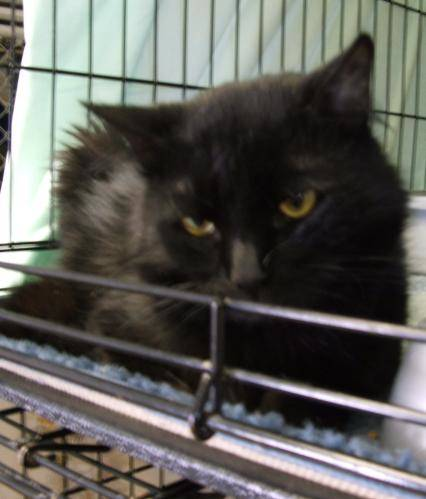

In [5]:
Image.open(str(cat_train[1245]))

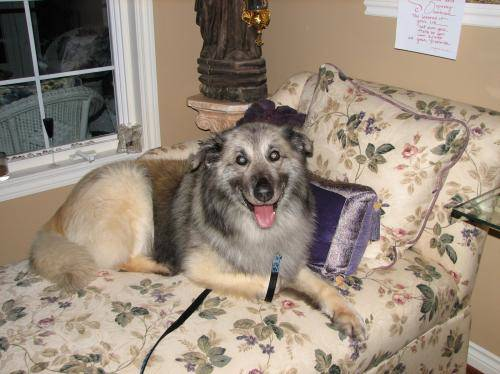

In [6]:
Image.open(str(dog_train[1569]))


In [7]:
images_dict = {
    'cats': cat_train,    
    'dogs': dog_train,
}
labels_dict = {
    'cats': 0,
    'dogs': 1,
    
}

In [8]:
images_dict["dogs"][:5]

[PosixPath('dog_cat_dataset/training_set/dogs/0071.jpg'),
 PosixPath('dog_cat_dataset/training_set/dogs/4217.jpg'),
 PosixPath('dog_cat_dataset/training_set/dogs/3578.jpg'),
 PosixPath('dog_cat_dataset/training_set/dogs/2666.jpg'),
 PosixPath('dog_cat_dataset/training_set/dogs/2100.jpg')]

In [9]:
img= cv2.imread(str(images_dict['cats'][0]))

In [10]:
img.shape

(245, 329, 3)

In [11]:
X, y = [], []
for name,images in images_dict.items():#returns key , path for each record
    for image in images:
        if '_DS_Store' in str(image):
            print(f"Skipping _DS_Store file: {image}")
            continue
        if '.DS_Store' in str(image):
            print(f"Skipping .DS_Store file: {image}")
            continue
        img=cv2.imread(str(image))
        if img is not None:
            resize_img = cv2.resize(img, (224, 224))
            X.append(resize_img)
            y.append(labels_dict[name])
        else:
            print(f"Unable to load image: {image}")


Skipping .DS_Store file: dog_cat_dataset/training_set/cats/.DS_Store
Skipping .DS_Store file: dog_cat_dataset/training_set/dogs/.DS_Store


In [12]:
X = np.array(X)
y = np.array(y)

In [13]:
print(X.shape)
print(y)


(9798, 224, 224, 3)
[0 0 0 ... 1 1 1]


In [14]:
from sklearn.model_selection import train_test_split
X_train, Y_train, x_label, y_label = train_test_split(X, y, test_size=0.20 ,random_state=4)

In [15]:
print(X_train.shape)
print(x_label.shape)
print(Y_train.shape)
print(y_label.shape)

(7838, 224, 224, 3)
(7838,)
(1960, 224, 224, 3)
(1960,)


In [16]:
train_images = X_train / 255.0

test_images = Y_train / 255.0


In [17]:
print(X_train[0])


[[[ 61  76 104]
  [ 59  73  96]
  [ 73  84 102]
  ...
  [208 208 202]
  [204 197 190]
  [213 212 208]]

 [[ 83  96 118]
  [ 65  75  94]
  [106 113 128]
  ...
  [206 206 200]
  [206 199 193]
  [212 211 207]]

 [[127 134 149]
  [119 124 137]
  [130 133 142]
  ...
  [197 197 191]
  [209 202 196]
  [215 214 210]]

 ...

 [[ 62  83 118]
  [ 58  84 118]
  [ 60  89 122]
  ...
  [143 148 147]
  [145 150 149]
  [149 154 152]]

 [[ 60  82 117]
  [ 54  81 115]
  [ 60  88 122]
  ...
  [144 149 148]
  [142 147 146]
  [138 143 141]]

 [[ 65  86 121]
  [ 55  81 116]
  [ 57  86 119]
  ...
  [145 150 149]
  [145 150 149]
  [145 150 148]]]


In [18]:
print(train_images[0])


[[[0.23921569 0.29803922 0.40784314]
  [0.23137255 0.28627451 0.37647059]
  [0.28627451 0.32941176 0.4       ]
  ...
  [0.81568627 0.81568627 0.79215686]
  [0.8        0.77254902 0.74509804]
  [0.83529412 0.83137255 0.81568627]]

 [[0.3254902  0.37647059 0.4627451 ]
  [0.25490196 0.29411765 0.36862745]
  [0.41568627 0.44313725 0.50196078]
  ...
  [0.80784314 0.80784314 0.78431373]
  [0.80784314 0.78039216 0.75686275]
  [0.83137255 0.82745098 0.81176471]]

 [[0.49803922 0.5254902  0.58431373]
  [0.46666667 0.48627451 0.5372549 ]
  [0.50980392 0.52156863 0.55686275]
  ...
  [0.77254902 0.77254902 0.74901961]
  [0.81960784 0.79215686 0.76862745]
  [0.84313725 0.83921569 0.82352941]]

 ...

 [[0.24313725 0.3254902  0.4627451 ]
  [0.22745098 0.32941176 0.4627451 ]
  [0.23529412 0.34901961 0.47843137]
  ...
  [0.56078431 0.58039216 0.57647059]
  [0.56862745 0.58823529 0.58431373]
  [0.58431373 0.60392157 0.59607843]]

 [[0.23529412 0.32156863 0.45882353]
  [0.21176471 0.31764706 0.45098039]


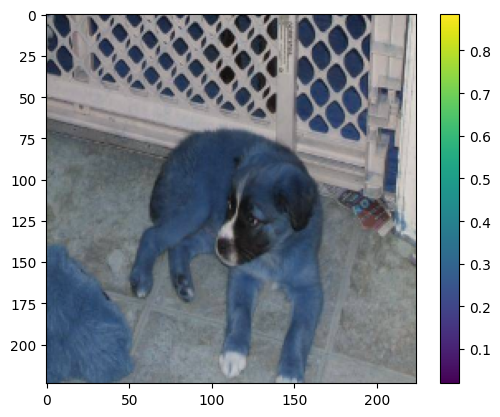

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
class_names = ['cats', 'dogs']

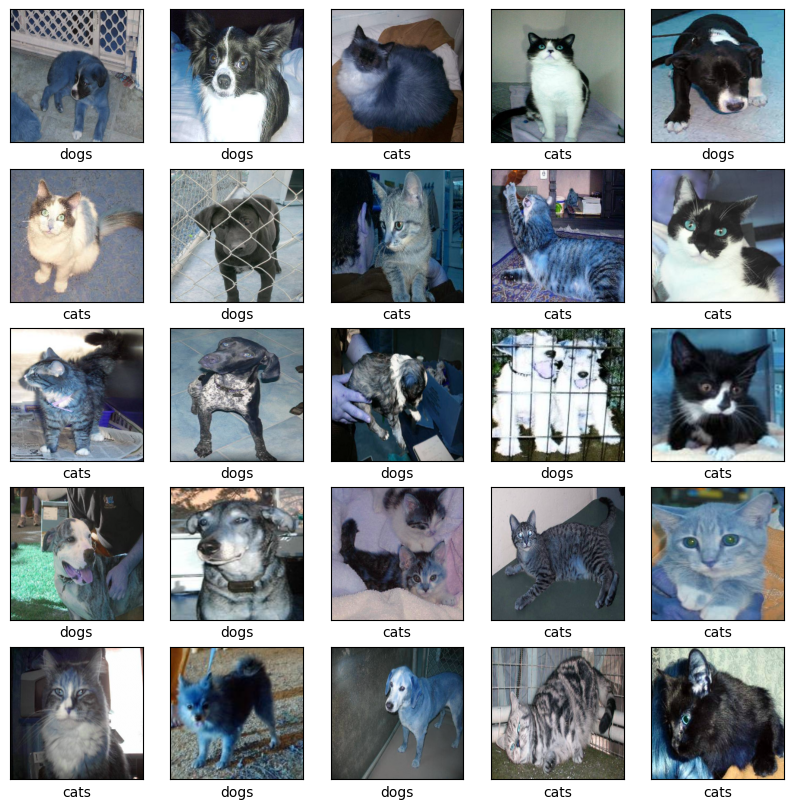

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[x_label[i]])
plt.show()

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)
])

/Users/jameslam/Desktop/tecky/ai/gpt_env/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
print(train_images.shape)
print(x_label.shape)

(7838, 224, 224, 3)
(7838,)


: 

In [25]:
model.fit(train_images, x_label , epochs=20)


In [ ]:
test_loss, test_acc = model.evaluate(test_images, y_label, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

62/62 - 1s - 17ms/step - accuracy: 0.5668 - loss: 0.6789

Test accuracy: 0.5668367147445679

Test loss: 0.6788835525512695


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [ ]:
predictions[0]


array([0.49094188, 0.50905806], dtype=float32)

In [ ]:
print(predictions[0])
print("model: ", np.argmax(predictions[12]))
print("actual: ", y_label[12])


[0.49094188 0.50905806]
model:  1
actual:  0


1

In [ ]:
print(predictions.shape)
print(y_label.shape)

(1960, 2)
(1960,)


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

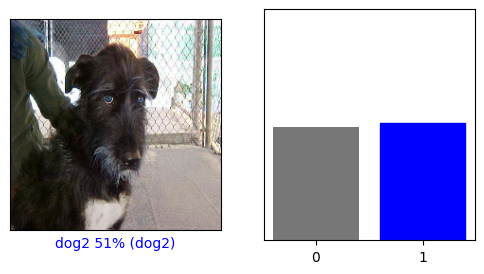

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_label, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_label)
plt.show()

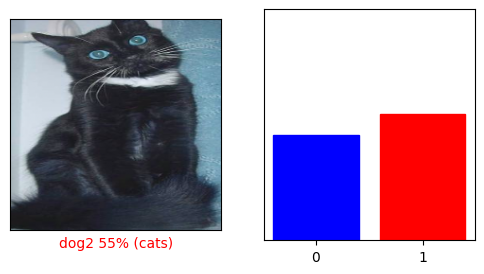

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_label, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_label)
plt.show()

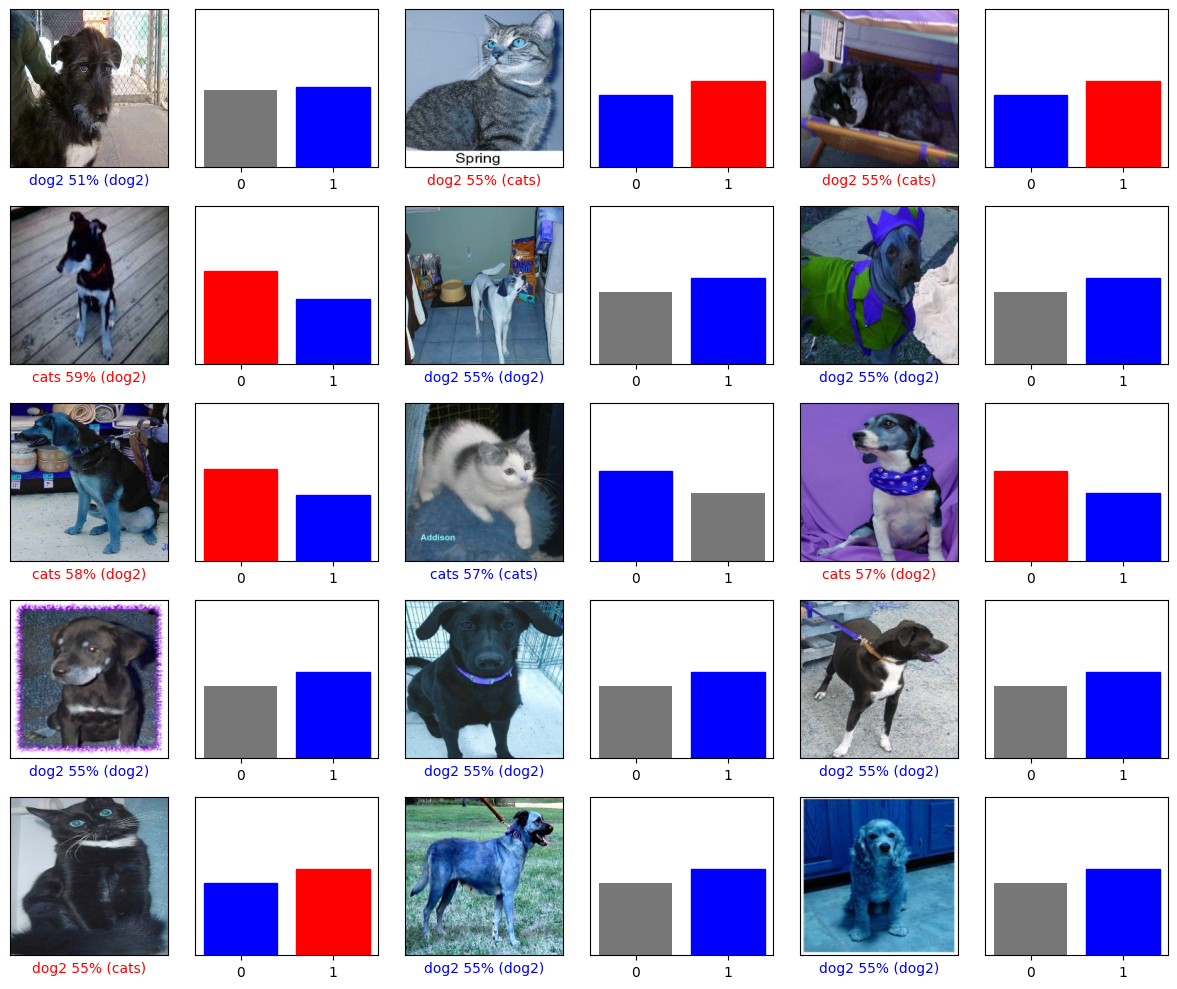

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_label, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_label)
plt.tight_layout()
plt.show()

In [ ]:
cat_test= list(test_dir.glob('cats/*'))
dog_test= list(test_dir.glob('dogs/*'))

print("Cat length: ", len(cat_test))
print("Dog length: ", len(dog_test))

Cat length:  101
Dog length:  101


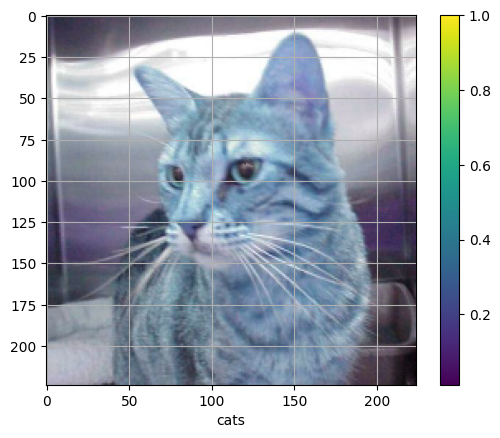

In [ ]:
predict_index = 45
# Grab an image from the test dataset.
image = cat_test[predict_index]
img = cv2.imread(str(image))

resize_img = cv2.resize(img, (224, 224))
resize_img = resize_img / 255.0

plt.figure()
plt.imshow(resize_img)
plt.colorbar()
plt.grid(True)
plt.xlabel(class_names[0])
plt.show()


In [ ]:
# Add the image to a batch where it's the only member.
resize_img = (np.expand_dims(resize_img,0))

print(resize_img.shape)

(1, 224, 224, 3)


In [ ]:
predictions_single = probability_model.predict(resize_img)
predictions_label = class_names[np.argmax(predictions_single[0])]

print(predictions_single)
print(predictions_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.51982737 0.48017257]]
cats


In [ ]:
probability_model.save("./my_model.h5")


: 